# Fitting

Often, we have a collection of data points, and we would like to determine a function (or model) that describes their distribution.  To do so, we must first select a functional form (e.g. $f(x)=mx+b$), and define a metric that represents the fit quality (where typically a high value of the metric implies a poor fit).  We then vary the parameters of the fit function and calculate the corresponding metric, until we find the minimum (best fit) value of the metric.

## Method of least squares

A common fit metric is the sum of the squares of the data/prediction residuals, where the residual is simply the vertical distance between the prediction and a particular data point.  Mathematically, this is given by
\begin{equation}\label{sumSquares}\tag{1}
S = \sum_{i=1}^n (y_{i,\mathrm{obs}} - y_{i,\mathrm{pred}})^2
\end{equation},
where the $y_i$ are the observed and predicted $y$ values corresponding to data point $i$, and $n$ is the number of data points.

The fit of a 1st order polynomial to 4 data points is shown below.  The residuals are shown in green.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Linear_least_squares_example2.png" alt="image" width="200"/>

In the case of a 1st order polynominal, this is known as "linear regression."  There is a nice PhET simulation that allows you to explore these ideas: https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html

### Example

Let's create some data and then fit a 1st order polynomial to it.

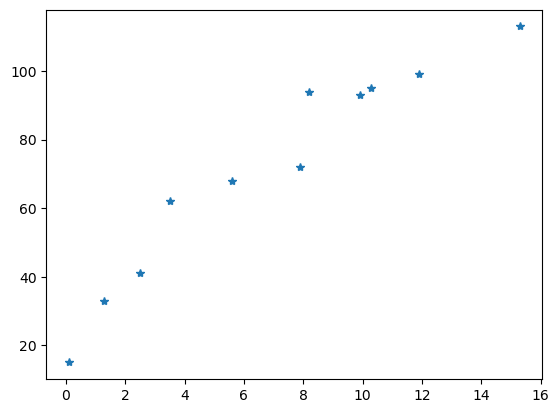

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create some data
xValues = np.array([0.1, 1.3, 2.5, 3.5, 5.6, 7.9, 8.2, 9.9, 10.3, 11.9, 15.3], float)
yValues = np.array([15 , 33 , 41 , 62 , 68 , 72 , 94 , 93 , 95  , 99  , 113 ], float)

# Plot it
plt.figure()
plt.plot(xValues, yValues, "*")

The ultimate goal of the fit is to find the values of $m$ and $b$ that minimize $S$.  

#### Brute force method

One way to do this is to perform a 2D scan over the parameters $m$ and $b$, calculating $S$ for each point in the scan.  First, let's define a function that calculates the value of $f(x)=mx+b$.

In [2]:
def func(x, m, b):
    return m*x + b

As a sanity check, let's draw this function for some value of $m$ and $b$.

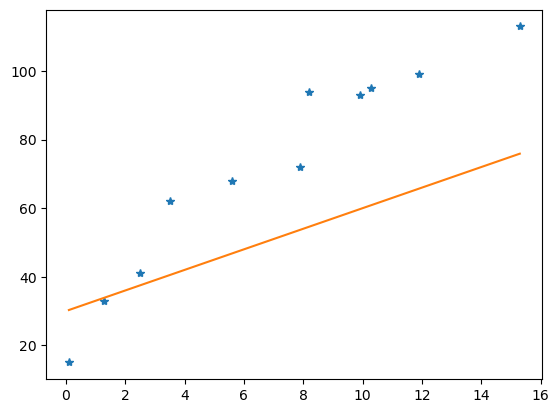

In [3]:
plt.figure()

plt.plot(xValues, yValues, "*")
plt.plot(xValues, func(xValues, 3, 30))

Now, let's perform the 2D scan.  In terms of pseudocode, we should:

```
Loop over various values of m:
  Loop over various values of b:
    Loop over all data points:
      Calculate sum of squares 
    If the sum of squares is less than the minimum value observed so far:
      Save the values of m and b
```

In terms of actual code, we could achieve this via:

Minimum sum of squares: S = 777.4
Best fit slope: m = 6.0
Best fit y-intercept: b = 30.0


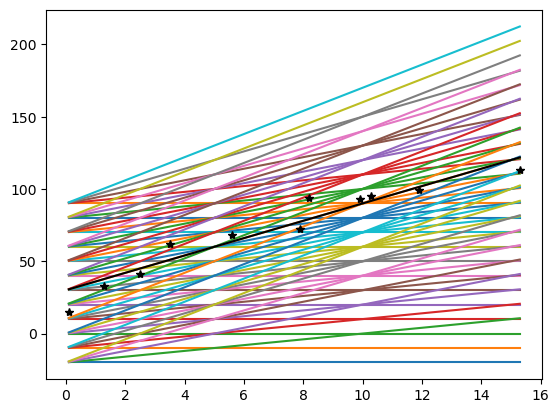

In [4]:
import math

#define the m and b values to test
mValues = np.arange(0, 10, 2)
bValues = np.arange(-20, 100, 10)

plt.figure()

minSumSquares = 9e9   #variable to hold the lowest observed sumSquares values
#variables to store the corresponding m and b values
mBest = None          
bBest = None

sumSquares = np.empty((len(mValues), len(bValues)), float)   #an array to store the calculated sumSquare values

# Loop over various values of m
for im, m in enumerate(mValues):
    # Loop over various values of b
    for ib, b in enumerate(bValues):

        # Loop over all data points
        s = 0   #initialize to zero before incrementing for each data point
        for ix, x in enumerate(xValues):
            # Calculate sum of squares
            observed = yValues[ix]
            predicted = func(x, m, b)        
            res = observed - predicted
            res2 = res * res
            s += res2          
        sumSquares[im, ib] = s   #save the value in an array so we can plot it later

        if s < minSumSquares: 
            minSumSquares = s
            mBest = m
            bBest = b

        # Plot the prediction
        plt.plot(xValues,func(xValues, m, b))

print("Minimum sum of squares: S = {:.1f}".format(minSumSquares))
print("Best fit slope: m = {:.1f}".format(mBest))
print("Best fit y-intercept: b = {:.1f}".format(bBest))

# Plot the data and each prediction
plt.plot(xValues, yValues                  , "*k") 
plt.plot(xValues, func(xValues,mBest,bBest),  "k")

What we have effectively done here is to find the minimum value of $S$ in the 2D plane of $m$ and $b$.

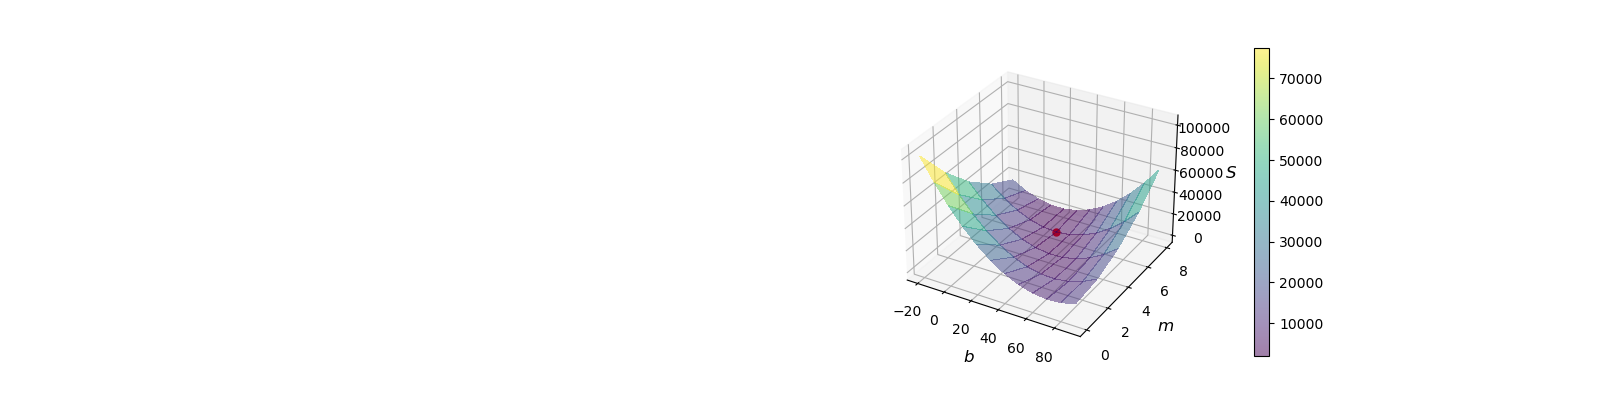

In [5]:
%matplotlib widget 

bGrid,mGrid = np.meshgrid(bValues, mValues)

fig = plt.figure(figsize=(16, 4))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(bGrid, mGrid, sumSquares, cmap='viridis', antialiased=False, alpha=.5)
fig.colorbar(surf)

ax.set_xlabel("$b$"      , fontsize=12)
ax.set_ylabel("$m$"      , fontsize=12)
ax.set_zlabel("$S$"      , fontsize=12)

ax.scatter([bBest],[mBest],[minSumSquares],color="red",s=25)

#### Monte Carlo method

Instead of iterating over a grid of fit parameters, we can simply try random values of $m$ and $b$.

Minimum sum of squares: S = 805.4
Best fit slope: m = 5.9
Best fit y-intercept: b = 29.9


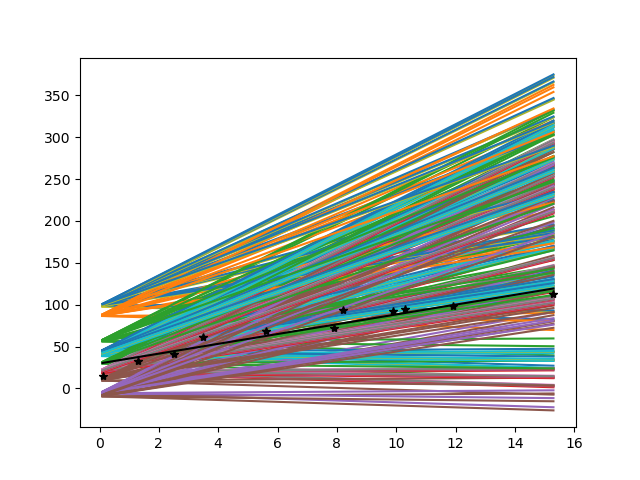

In [6]:
# Create an array of values for slope and y-intercept to try out
mValues = np.random.uniform(-4,   20, 20) 
bValues = np.random.uniform(-20, 100, 20)

##############################################################################
# The remaiming code is an exact copy of the code above
##############################################################################

plt.figure()

minSumSquares = 9e9   #variable to hold the lowest observed sumSquares values
#variables to store the corresponding m and b values
mBest = None          
bBest = None

sumSquares = np.empty((len(mValues), len(bValues)), float)   #an array to store the calculated sumSquare values

# Loop over various values of m
for im, m in enumerate(mValues):
    # Loop over various values of b
    for ib, b in enumerate(bValues):

        # Loop over all data points
        s = 0   #initialize to zero before incrementing for each data point
        for ix, x in enumerate(xValues):
            # Calculate sum of squares
            observed = yValues[ix]
            predicted = func(x, m, b)        
            res = observed - predicted
            res2 = res * res
            s += res2          
        sumSquares[im, ib] = s   #save the value in an array so we can plot it later

        if s < minSumSquares: 
            minSumSquares = s
            mBest = m
            bBest = b

        # Plot the prediction
        plt.plot(xValues,func(xValues, m, b))

print("Minimum sum of squares: S = {:.1f}".format(minSumSquares))
print("Best fit slope: m = {:.1f}".format(mBest))
print("Best fit y-intercept: b = {:.1f}".format(bBest))

# Plot the data and each prediction
plt.plot(xValues, yValues                  , "*k") 
plt.plot(xValues, func(xValues,mBest,bBest), "k")

#### Analytical solution

In this case, we can actually solve analytically for the best-fit slope and $y$-intercept.  Starting from Eqn. (1), and substituting $y_{i,\mathrm{pred}} = mx_i + b$, we arrive at the equation
\begin{equation}\label{sumSquares2}\tag{2}
S = \sum_{i=1}^n [y_{i,\mathrm{obs}}^2 - 2y_{i,\mathrm{obs}}(mx_i+b) + (m^2x_i^2 + 2mx_ib + b^2)]
\end{equation}.  We are seeking the values of $m$ and $b$ which minimize this function.  To find these values, we can take the partial derivative with respect to both variables and require them to equal zero, yielding
\begin{align}\label{sumSquares3}\tag{3}
\frac{\partial S}{\partial b} &= \sum [-2y_{i,\mathrm{obs}} + 2mx_i+2b]=0 & \frac{\partial S}{\partial m} &= \sum [-2y_{i,\mathrm{obs}}x_i + 2mx_i^2+2x_ib]=0
\end{align}.
These expressions can be simplified using the fact that $\sum_i^n z_i = \bar{z}n$, where the bar notation is used to indicate the average value of the corresponding variable.  Using this fact yields
\begin{align}\label{sumSquares4}\tag{4}
b &= \bar{y} - m\bar{x} & m &= \frac{\sum_i(x_i-\bar{x})(y_{i,\mathrm{obs}}-\bar{y})}{\sum_i(x_i-\bar{x})^2}
\end{align}.

Let's use these relations to calculate the best-fit slope and $y$-intercept.

In [7]:
#Calculate the mean of the x and y values
xBar = np.mean(xValues)
yBar = np.mean(yValues)

num = den = 0   #initialize counters
#loop over data points
for x,y in zip(xValues,yValues):   # zip(a,b) = [(a1, b1), (a2, b2), ...]
    num += (x-xBar)*(y-yBar)
    den += (x-xBar)*(x-xBar)
    
m = num/den
b = yBar - m*xBar

print("m = {}".format(m))
print("b = {}".format(b))

m = 6.250049625624292
b = 27.897382149067425


Let's confirm that this gives a lower value of the sum of the squares of the residuals.

In [8]:
s = 0   #initialize to zero before incrementing for each data point
for ix, x in enumerate(xValues):
    # Calculate sum of squares
    observed = yValues[ix]
    predicted = func(x, m, b)        
    res = observed - predicted
    res2 = res * res
    s += res2

s

761.5880676178906

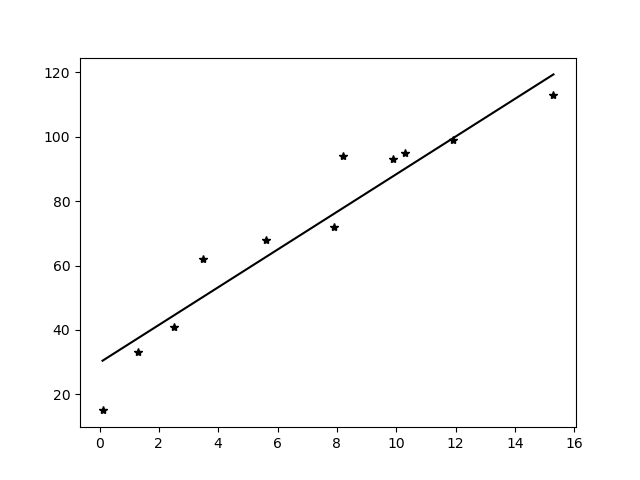

In [9]:
plt.figure()

plt.plot(xValues, yValues                  , "*k") 
plt.plot(xValues, func(xValues,mBest,bBest), "k")

## Fitting with scipy

For larger datasets or more complicated fit functions, the problem is more challenging and it is best to use dedicated tools, such as those contained within the scipy module.  The main scipy function we will use to perform fits to data is the `curve_fit()` function: https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html

Let's use this function to fit the same data as above.  In addition to passing the fit function and data points to `curve_fit()`, we should also provide an initial guess for the parameter values using the `p0` argument.  After performing the fit, this function returns a 1D `array` of best fit parameters and the 2D covariance matrix (related to the parameter uncertainties).

In [10]:
from scipy.optimize import curve_fit

#p0 represents the initial guess for each parameter
popt, pcov = curve_fit(func, xValues, yValues, p0 = [1, 1])   

m = popt[0]
b = popt[1]

print("m = {}".format(m))
print("b = {}".format(b))

m = 6.250049624217776
b = 27.897382150355277


Note that these values agree with our analytical solution to several decimal places.

We should also be mindful of the uncertainty on the fit parameters, which are given by the square root of the diagonal elements of the covariance matrix.

m = 6.250049624217776 ± 0.6079013987618836
b = 27.897382150355277 ± 5.056290025593453


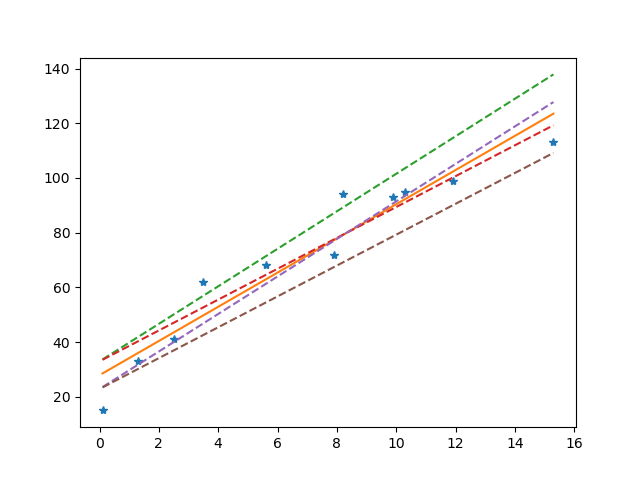

In [11]:
mSigma = pcov[0,0]**0.5
bSigma = pcov[1,1]**0.5

plt.figure()

plt.plot(xValues,yValues,"*")
plt.plot(xValues,func(xValues,m,b))
plt.plot(xValues,func(xValues,m+mSigma,b+bSigma),"--")
plt.plot(xValues,func(xValues,m-mSigma,b+bSigma),"--")
plt.plot(xValues,func(xValues,m+mSigma,b-bSigma),"--")
plt.plot(xValues,func(xValues,m-mSigma,b-bSigma),"--")

print("m = {} \u00B1 {}".format(m,mSigma))
print("b = {} \u00B1 {}".format(b,bSigma))

The uncertainty on the fit result is given by the standard deviation of these four parameter variations.  The `fill_between()` function is useful for drawing an "uncertainty band" to represent this.

fitError =  [ 5.05665544  5.11767509  5.27974616  5.48570726  6.09548785  6.97347236
  7.10029681  7.86034904  8.04804346  8.82593963 10.58643706]


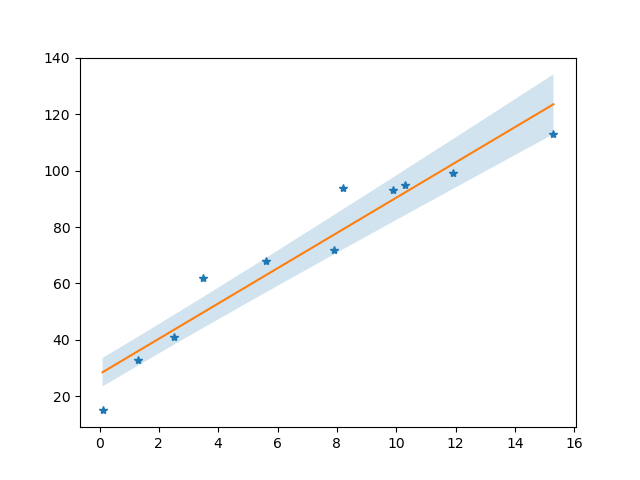

In [12]:
plt.figure()

plt.plot(xValues,yValues,"*")
plt.plot(xValues,func(xValues,m,b))

variations = np.array([
    func(xValues,m+mSigma,b+bSigma),
    func(xValues,m-mSigma,b+bSigma),
    func(xValues,m+mSigma,b-bSigma),
    func(xValues,m-mSigma,b-bSigma),
    ])

fitError = np.std(variations, axis=0)
print('fitError = ',fitError)

funcUp   = func(xValues,m,b)+fitError
funcDown = func(xValues,m,b)-fitError

plt.fill_between(xValues, funcUp, funcDown, alpha=0.2) 

Of course, we are not limited to linear (first order polynomial) fits.  We can perform a second order polynomial fit by simply modifying the fit function.

a = -0.2977046922598849 ± 0.009716715966948316
b = 10.56376302955709 ± 2.234352735896172
c = 18.493488755991475 ± 23.134519439571335


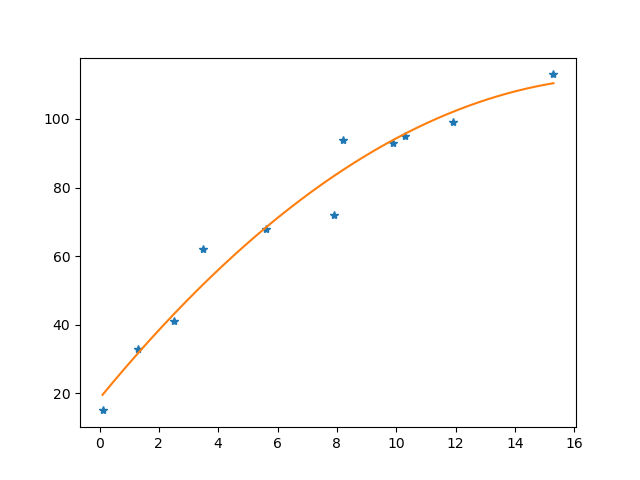

In [13]:
def func2(x, a, b, c):
    return a*x*x + b*x + c

popt, pcov = curve_fit(func2, xValues, yValues, p0 = [1, 1, 1])

a = popt[0]
b = popt[1]
c = popt[2]

aSigma = pcov[0,0]
bSigma = pcov[1,1]
cSigma = pcov[2,2]

plt.figure()
plt.plot(xValues,yValues,"*")

denseXValues = np.linspace(np.min(xValues),np.max(xValues),1000)   #use a denser grid of x values to avoid artificial kinks
plt.plot(denseXValues,func2(denseXValues,a,b,c))

print("a = {} \u00B1 {}".format(a,aSigma))
print("b = {} \u00B1 {}".format(b,bSigma))
print("c = {} \u00B1 {}".format(c,cSigma))

Perhaps the data is better described by a logarithmic function.

a = 19.645716678165474 ± 8.78659299036712
b = 8.948343808885 ± 27.512998988063245


/Users/jstupak/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


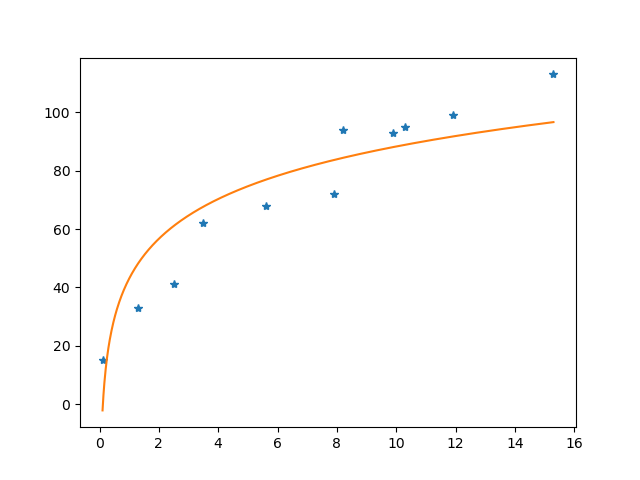

In [14]:
def funcLog(x, a, b):
    return a * np.log(b*x)

popt, pcov = curve_fit(funcLog, xValues, yValues, p0 = [1, 1])

a = popt[0]
b = popt[1]

aSigma = pcov[0,0]
bSigma = pcov[1,1]

plt.figure()

plt.plot(xValues,yValues,"*")
plt.plot(denseXValues,funcLog(denseXValues,a,b))

print("a = {} \u00B1 {}".format(a,aSigma))
print("b = {} \u00B1 {}".format(b,bSigma))

### Taking uncertainties into account

So far, we have been ignoring any uncertainty on the measurement of the data points.  However, this uncertainty can have a significant impact on the fit results.

Let's consider the uncertainty on the $y$ values and repeat the logarithmic fit.  To do so, we just pass an array containing the point-by-point uncertainty to the `curve_fit()` function using the `sigma` argument.

a = 11.605620325299624 ± 3.1501818045866723
b = 28.822375622113956 ± 216.7739050919963


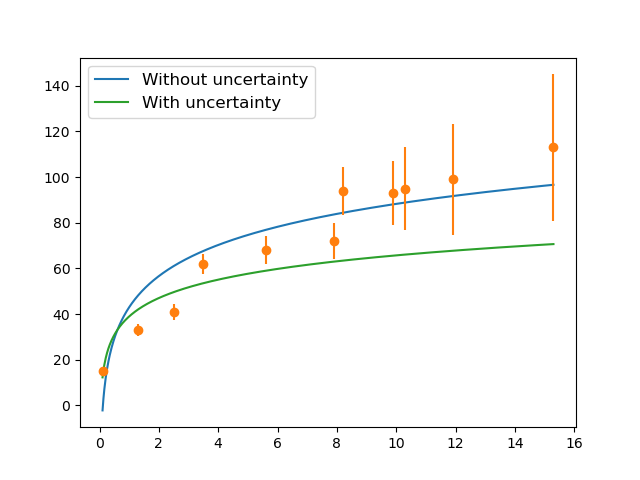

In [15]:
#first, plot the fit results using the parameter values found above
plt.figure()
plt.plot(denseXValues,funcLog(denseXValues,a,b), label="Without uncertainty")   

###########################################################################
#now perform the fit with uncertainty given by:
yErrors = np.array([2.0, 2.6, 3.4, 4.5, 6.0, 8.0, 10.5, 13.9, 18.3, 24.2, 32.0], float)

popt, pcov = curve_fit(funcLog, xValues, yValues, p0 = [1, 1], sigma=yErrors)

a = popt[0]
b = popt[1]

aSigma = pcov[0,0]
bSigma = pcov[1,1]

plt.errorbar(xValues, yValues, yErrors, fmt="o", linestyle='')
plt.plot(denseXValues,funcLog(denseXValues,a,b), label="With uncertainty")

plt.legend(loc='upper left', fontsize='large')

print("a = {} \u00B1 {}".format(a,aSigma))
print("b = {} \u00B1 {}".format(b,bSigma))

Generally speaking, the original fit overshoots (undershoots) the first (last) several data points.  In this particular case, the uncertainty grows with $x$.  Therefore the second fit (considering the uncertainty) weights the first points more heavily.  This improves the fit results at small $x$, but worsens the agreement at large $x$.

What exactly did numpy do with the uncertainty we gave it?  It replaced the fit metric $S = \sum_{i=1}^n (y_{i,\mathrm{obs}} - y_{i,\mathrm{pred}})^2$ with $\chi^2=\sum_{i=1}^{n}\frac{(y_{i,\mathrm{obs}} - y_{i,\mathrm{pred}})^2}{\sigma_i^2}$.  Let's do a linear fit by hand and compare to the scipy result.

m = 7.924899020990429
b = 21.75697190160563


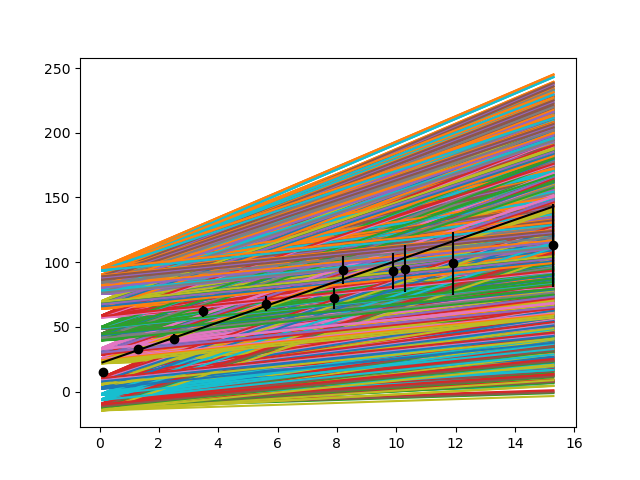

In [16]:
#do a finer sampling than previously (to get better results)
mValues = np.random.uniform(0,   10, 50) 
bValues = np.random.uniform(-20, 100,50)

plt.figure()

minSumSquares = 9e9
mBest = None          
bBest = None

sumSquares = np.empty((len(mValues), len(bValues)), float)
for im, m in enumerate(mValues):
    for ib, b in enumerate(bValues):

        s = 0
        for ix, x in enumerate(xValues):
            # Calculate sum of squares
            observed = yValues[ix]
            predicted = func(x, m, b)        
            res = observed - predicted
            res2 = res * res
            s += res2/(yErrors[ix] * yErrors[ix])          #THIS IS THE ONLY LINE THAT DIFFERS FROM THE EXAMPLE ABOVE
        sumSquares[im, ib] = s

        if s < minSumSquares: 
            minSumSquares = s
            mBest = m
            bBest = b

        plt.plot(xValues,func(xValues, m, b))

print("m = {}".format(mBest))
print("b = {}".format(bBest))

plt.errorbar(xValues, yValues, yErrors, fmt="ok", linestyle='') 
plt.plot(xValues, func(xValues,mBest,bBest), "k")

And now using scipy, we get:

m = 8.67160035005688 ± 0.7620815757152606
b = 18.10539011343026 ± 6.5709409560126675


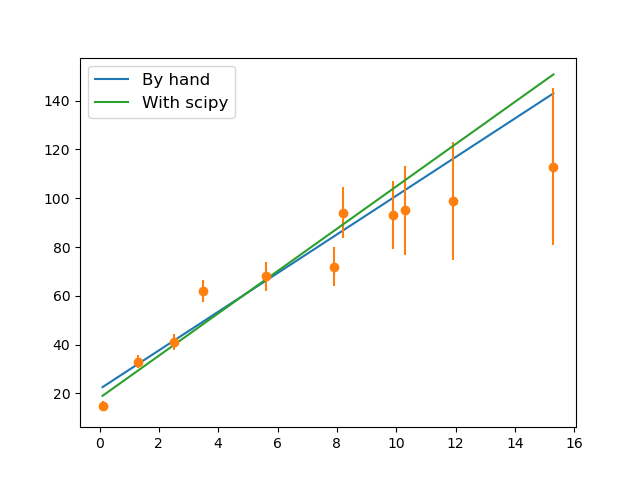

In [17]:
#first, plot the fit results using the parameter values found above
plt.figure()
plt.plot(denseXValues,func(denseXValues,mBest,bBest), label="By hand")   

###########################################################################
#now perform the fit using scipy

popt, pcov = curve_fit(func, xValues, yValues, p0 = [1, 1], sigma=yErrors, absolute_sigma=False)

m = popt[0]
b = popt[1]

mSigma = pcov[0,0]
bSigma = pcov[1,1]

plt.errorbar(xValues, yValues, yErrors, fmt="o", linestyle='')
plt.plot(denseXValues,func(denseXValues,m,b), label="With scipy")

plt.legend(loc='upper left', fontsize='large')

print("m = {} \u00B1 {}".format(m,mSigma))
print("b = {} \u00B1 {}".format(b,bSigma))

We see a small difference between the two results, because our random sampling of $m$ and $b$ values is not as intelligent as the scipy approach (which is also far more complex).

Unfortunately, the `curve_fit()` function can't handle uncertainty along the $x$ axis, which is beyond the scope of this course.

### Fitting a histogram

When performing a fit to a histogram, we should consider the bin content to be located at the corresponding bin center.  Aside from generating an `array` of bin centers, the procedure is identical to that above.

N   = 11489.40896513514 ± 282.32924876293265
tau = 6.976959638153087 ± 0.0002453934725076603
C   = 1.1270618311142484 ± 6.481247722470326


(1, 20000.0)

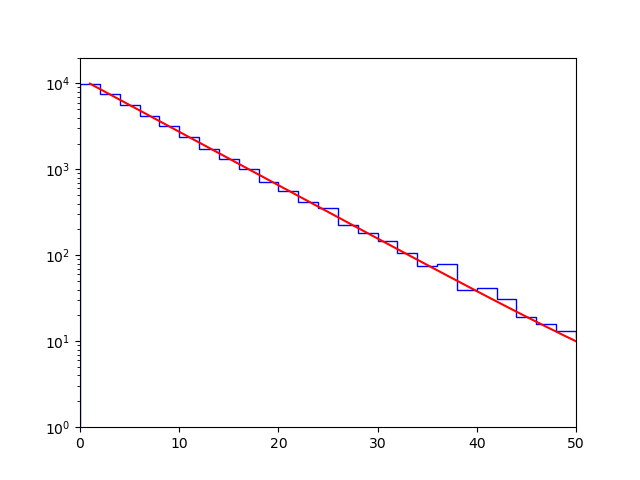

In [18]:
# Create some fake data with np.random.exponential
Npoints = 40000
trueTau = 7      
s = np.random.exponential(trueTau, Npoints)   # f(x)=(1/tau)e^(-x/tau)

###########################################################################

plt.figure()
(n,binEdges,patches) = plt.hist(s, bins=50, range=(0,100), histtype='step',color='blue')   #make the histogram, save bin edges

binCenters = 0.5*(binEdges[:-1] + binEdges[1:])   #get the bin centers

# define the function to fit
def f(t, N, tau, C):
    return N*np.exp(-t/tau) + C

popt, pcov = curve_fit(f, binCenters, n, p0 = [1,1,1])

N         = popt[0]
fittedTau = popt[1]
C         = popt[2]

NSigma         = pcov[0,0]
fittedTauSigma = pcov[1,1]
CSigma         = pcov[2,2]

print("N   = {} \u00B1 {}".format(N,NSigma))
print("tau = {} \u00B1 {}".format(fittedTau,fittedTauSigma))
print("C   = {} \u00B1 {}".format(C,CSigma))

plt.plot(binCenters, f(binCenters, N, fittedTau, C), 'r')
plt.yscale('log')
plt.xlim(0, 50)
plt.ylim(1, 2e4)

## Exercise

Read in the file `../Data/temperatures_average.txt`. The first column of data contains the date and the second contains the average temperature in a city.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
date, temperature = np.loadtxt('https://raw.githubusercontent.com/jstupak/ComputationalPhysics/master/Data/temperatures_average.txt', unpack=True)
```
    
</details>

Make a plot with the date on the $x$-axis and the average temperature on the $y$-axis.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
plt.figure()
plt.plot(date, temperature)
```
    
</details>

Note that there are some outlier data points which we should disregard. Exclude all data points with a temperature whose absolute value is greater than 90.  Print the number of data points before and after cleaning.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
print("Before:",date.size,temperature.size)

goodData = np.abs(temperature) < 90
date = date[goodData]
temperature = temperature[goodData]

print("After:",date.size,temperature.size)
```
    
</details>

Plot the data again, now with only good data.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
plt.figure()
plt.plot(date, temperature)
```
    
</details>

Fit the data, defining a function of the form  $f(y) = A\cos(2\pi x + B) + C$. Once you know the parameters $A$, $B$, and $C$ (the result of your fit), plot the function on top of your data.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
def cos(x, A, B, C):
    return A*np.cos(2*np.pi*x + B) + C

popt, pcov = curve_fit(cos, date, temperature, p0 = [1,1,1])

A = popt[0]
B = popt[1]
C = popt[2]

print("A = ", A)
print("B = ", B)
print("C = ", C)

plt.figure()
plt.plot(date, temperature)
plt.plot(date, cos(date, A, B, C))
```
    
</details>

Calculate the average temperature over the entire period.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
np.mean(temperature)
```
    
</details>

What is the meaning of parameter $C$?

<details>
    <summary style="display:list-item">Click for solution</summary>

It represents the average temperature.
    
</details>